In [240]:
# loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import log, sqrt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.cross_decomposition import PLSRegression as PLS
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [126]:
# load datasets
calibration = pd.read_csv("calibration.csv")
sample = pd.read_csv("sample.csv")

In [5]:
calibration

,User: USER,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 284,Unnamed: 285,Unnamed: 286,Unnamed: 287,Unnamed: 288,Unnamed: 289,Unnamed: 290,Unnamed: 291,Unnamed: 292,Unnamed: 293
0,Path: C:\Program Files (x86)\BMG\CLARIOstar\Us...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Test ID: 1353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Test Name: Magui_spec sweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Date: 16/03/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Time: 16:23:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Absorbance spectrum,NaN,NaN,NaN,Absorbance values are displayed as OD,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),...,Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum)
9,Well,Sample,Dilution,220,222,224,226,228,230,232,...,782,784,786,788,790,792,794,796,798,800


### 1. First eight lines are useless so I get rid of them
### 2. The information about wells is not interesting, too
### 3. We have only one sample of pigment with different dilutions so the "Sample" column is important only to separate blank and sample data

In [8]:
calibration = pd.DataFrame(calibration.values[10:,:], columns = calibration.values[9,:])

In [9]:
calibration

,Well,Sample,Dilution,220,222,224,226,228,230,232,...,782,784,786,788,790,792,794,796,798,800
0,A1,S1,1,3.736,3.389,3.636,4.059,4.713,4.672,5.287,...,0.061,0.061,0.062,0.06,0.06,0.06,0.061,0.06,0.06,0.059
1,A3,S1,2,3.669,3.651,3.956,4.445,5.287,5.287,5.287,...,0.054,0.054,0.055,0.053,0.053,0.053,0.055,0.053,0.053,0.052
2,A5,S1,4,3.232,4.083,4.167,3.785,5.164,5.028,5.112,...,0.053,0.054,0.052,0.051,0.051,0.051,0.052,0.05,0.05,0.05
3,A7,S1,8,3.131,3.328,3.814,4.026,4.893,5.287,4.825,...,0.051,0.05,0.05,0.049,0.049,0.05,0.05,0.049,0.051,0.048
4,A9,S1,16,3.235,3.784,4.502,4.987,5.287,5.287,5.287,...,0.053,0.052,0.052,0.051,0.051,0.052,0.052,0.052,0.052,0.05
5,A11,S1,32,3.043,3.826,3.722,3.854,4.973,5.287,5.145,...,0.052,0.051,0.051,0.051,0.05,0.051,0.051,0.051,0.052,0.051
6,B1,S1,64,3.381,3.484,4.089,3.829,4.271,4.722,5.033,...,0.053,0.053,0.053,0.051,0.051,0.051,0.052,0.052,0.051,0.05
7,B3,S1,128,3.772,4.212,3.998,4.006,5.002,5.106,4.814,...,0.052,0.052,0.052,0.051,0.05,0.051,0.052,0.051,0.052,0.05
8,B5,S1,1,2.956,3.329,3.306,3.651,4.246,4.593,5.065,...,0.076,0.075,0.075,0.075,0.074,0.074,0.075,0.074,0.073,0.073
9,B7,S1,2,3.248,3.987,4.444,4.681,4.528,5.07,5.115,...,0.055,0.055,0.054,0.053,0.052,0.053,0.054,0.054,0.053,0.052


### Much better!

### Let's have a look at the solvent spectrum 

Text(0.5, 1.0, 'solvent spectrum')

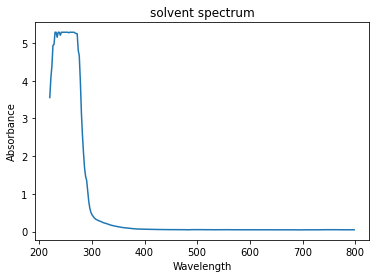

In [19]:
plt.plot(range(220, 800, 2),
         calibration.values[24:,4:].astype(float).mean(0))
plt.xlabel("Wavelength")
plt.ylabel("Absorbance")
plt.title("solvent spectrum")

### 1. The Solvent demonstrate significant absorbance within wavelength 200 - 300 nm that can mask pigment  absorbance.
### 2. This effect is probably due to aromatic compounds but it does not matter as we are removing this part of spectrum everywhere as it can influence the final accuracy.
### 3. The solvent has also some absorbtion from 300 to 400 but it can also contain useful information so let's leave it now

### Now I am removing 200 - 300 nm  part and substracting all the  blank spectrum from all data

In [47]:
data_clean = calibration[calibration["Sample"] == "S1"]
data_clean = data_clean[["Dilution"] + [str(i) for i in range(300, 802, 2)]]
data_clean[[str(i) for i in range(300, 802, 2)]] = data_clean[[str(i) for i in range(300, 802, 2)]].values.astype(float) - calibration[calibration["Sample"] == "Blank"][[str(i) for i in range(300, 802, 2)]].values.astype(float).mean(0)

In [48]:
data_clean

,Dilution,300,302,304,306,308,310,312,314,316,...,782,784,786,788,790,792,794,796,798,800
0,1,0.138667,0.130,0.122,0.114333,0.108333,0.105667,0.104333,0.103,0.102333,...,0.010333,1.100000e-02,0.012333,1.100000e-02,1.100000e-02,0.010667,0.011667,0.010333,0.010333,0.010333
1,2,0.048667,0.047,0.046,0.044333,0.043333,0.041667,0.042333,0.042,0.042333,...,0.003333,4.000000e-03,0.005333,4.000000e-03,4.000000e-03,0.003667,0.005667,0.003333,0.003333,0.003333
2,4,0.013667,0.014,0.015,0.015333,0.015333,0.015667,0.016333,0.017,0.017333,...,0.002333,4.000000e-03,0.002333,2.000000e-03,2.000000e-03,0.001667,0.002667,0.000333,0.000333,0.001333
3,8,-0.027333,-0.023,-0.020,-0.016667,-0.014667,-0.014333,-0.012667,-0.011,-0.009667,...,0.000333,-6.938894e-18,0.000333,-6.938894e-18,-6.938894e-18,0.000667,0.000667,-0.000667,0.001333,-0.000667
4,16,-0.034333,-0.029,-0.025,-0.021667,-0.018667,-0.016333,-0.015667,-0.014,-0.012667,...,0.002333,2.000000e-03,0.002333,2.000000e-03,2.000000e-03,0.002667,0.002667,0.002333,0.002333,0.001333
5,32,-0.055333,-0.048,-0.044,-0.039667,-0.035667,-0.032333,-0.030667,-0.030,-0.027667,...,0.001333,1.000000e-03,0.001333,2.000000e-03,1.000000e-03,0.001667,0.001667,0.001333,0.002333,0.002333
6,64,-0.004333,-0.002,-0.002,-0.001667,-0.001667,-0.000333,-0.000667,-0.001,-0.000667,...,0.002333,3.000000e-03,0.003333,2.000000e-03,2.000000e-03,0.001667,0.002667,0.002333,0.001333,0.001333
7,128,-0.020333,-0.017,-0.014,-0.012667,-0.010667,-0.009333,-0.007667,-0.008,-0.007667,...,0.001333,2.000000e-03,0.002333,2.000000e-03,1.000000e-03,0.001667,0.002667,0.001333,0.002333,0.001333
8,1,0.188667,0.175,0.165,0.155333,0.148333,0.143667,0.141333,0.139,0.138333,...,0.025333,2.500000e-02,0.025333,2.600000e-02,2.500000e-02,0.024667,0.025667,0.024333,0.023333,0.024333
9,2,0.073667,0.069,0.066,0.062333,0.060333,0.056667,0.056333,0.055,0.055333,...,0.004333,5.000000e-03,0.004333,4.000000e-03,3.000000e-03,0.003667,0.004667,0.004333,0.003333,0.003333


### Let's see the spectrum for different dilutions together

/tmp/ipykernel_10552/3386349169.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aggregated_data = data_clean.groupby(['Dilution'], as_index=False).mean()


Text(0.5, 1.0, 'Sample absorbtion spectra')

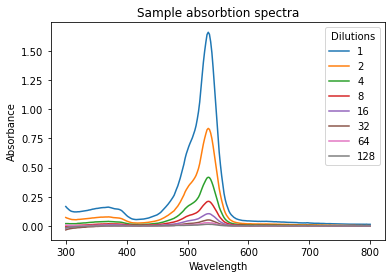

In [83]:
aggregated_data = data_clean.groupby(['Dilution'], as_index=False).mean()
for dilution in sorted(list(set(data_clean['Dilution'].astype(int)))):
    plt.plot(range(300, 802, 2), 
             aggregated_data[aggregated_data["Dilution"] == str(dilution)].values[0,1:],
             label = dilution)
    
plt.legend(title="Dilutions")
plt.xlabel("Wavelength")
plt.ylabel("Absorbance")
plt.title("Sample absorbtion spectra")

### 1. What we can see here is if we want to use one spectrum line it will be the maximum of absorbtion between 500 and 600 nm as we can see some absorbtion even for the highest dilution
### 2. But we can probably do better and use all the information we have by applying PLS regression technique


In [90]:
# prepare dependent variable column, initial concentration is 50 mg/ml, so 
y = 50. / data_clean['Dilution'].values.astype(float)
# Wavelengths as features 
X = data_clean[[str(i) for i in range(300, 802, 2)]]

In [116]:
# First, select a test set
# Then perform leave-one-out crossvalidation varying number of components from 1 to 10  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for nc in range(1, 20):
    pls = PLS(n_components=nc)
    error = cross_val_score(pls, X_train, y_train, cv=len(y_train), scoring='neg_mean_squared_error').mean()
    test_error = mean_squared_error(y_test, pls.fit(X_train, y_train).predict(X_test), squared = False)
    print("Number of components {:2d} with RMSE (CV) = {:.4f} and test set error {:.4f}".format(nc, -error, test_error))


Number of components  1 with RMSE (CV) = 5.7808 and test set error 8.4335
Number of components  2 with RMSE (CV) = 0.4975 and test set error 1.9356
Number of components  3 with RMSE (CV) = 0.1607 and test set error 1.5048
Number of components  4 with RMSE (CV) = 0.0860 and test set error 1.2436
Number of components  5 with RMSE (CV) = 0.0728 and test set error 1.1851
Number of components  6 with RMSE (CV) = 0.0700 and test set error 1.1111
Number of components  7 with RMSE (CV) = 0.0699 and test set error 1.1224
Number of components  8 with RMSE (CV) = 0.0691 and test set error 1.1288
Number of components  9 with RMSE (CV) = 0.0687 and test set error 1.1273
Number of components 10 with RMSE (CV) = 0.0687 and test set error 1.1267
Number of components 11 with RMSE (CV) = 0.0687 and test set error 1.1270
Number of components 12 with RMSE (CV) = 0.0687 and test set error 1.1270
Number of components 13 with RMSE (CV) = 0.0687 and test set error 1.1270
Number of components 14 with RMSE (CV)

/home/dkarlov/anaconda3/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 17
  warnings.warn(f"Y residual is constant at iteration {k}")
/home/dkarlov/anaconda3/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 17
  warnings.warn(f"Y residual is constant at iteration {k}")
/home/dkarlov/anaconda3/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 17
  warnings.warn(f"Y residual is constant at iteration {k}")
/home/dkarlov/anaconda3/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 17
  warnings.warn(f"Y residual is constant at iteration {k}")
/home/dkarlov/anaconda3/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 17
  warnings.warn(f"Y residual is con

Number of components 19 with RMSE (CV) = 0.0687 and test set error 1.1270


/home/dkarlov/anaconda3/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 18
  warnings.warn(f"Y residual is constant at iteration {k}")


### We observe the best performance on the external test set with 6 components

### Now prepare the test set to make predictions

In [119]:
sample

,User: USER,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 284,Unnamed: 285,Unnamed: 286,Unnamed: 287,Unnamed: 288,Unnamed: 289,Unnamed: 290,Unnamed: 291,Unnamed: 292,Unnamed: 293
0,Path: C:\Program Files (x86)\BMG\CLARIOstar\Us...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Test ID: 1122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Test Name: Magui_spec sweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Date: 21/02/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Time: 17:46:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Absorbance spectrum,NaN,NaN,NaN,Absorbance values are displayed as OD,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),...,Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum)
9,Well,Sample,Dilution,220,222,224,226,228,230,232,...,782,784,786,788,790,792,794,796,798,800


In [256]:
#sample = pd.DataFrame(sample.values[10:,:], columns = sample.values[9,:])
sample_clean = sample[sample["Sample"] == "X1"]
sample_clean = sample_clean[["Dilution"] + [str(i) for i in range(300, 802, 2)]]
sample_clean[[str(i) for i in range(300, 802, 2)]] = sample_clean[[str(i) for i in range(300, 802, 2)]].values.astype(float) - sample[sample["Sample"] == "Blank"][[str(i) for i in range(300, 802, 2)]].values.astype(float).mean(0)

### Draw test absorbtion

/tmp/ipykernel_10552/3905970868.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aggregated_sample = sample_clean.groupby(['Dilution'], as_index=False).mean()


Text(0.5, 1.0, 'Sample absorbtion spectra')

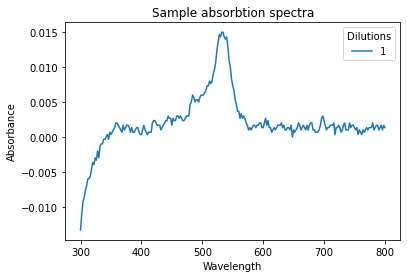

In [257]:
aggregated_sample = sample_clean.groupby(['Dilution'], as_index=False).mean()
plt.plot(range(300, 802, 2), 
         aggregated_data[aggregated_data["Dilution"] == str(dilution)].values[0,1:],
         label = 1)
    
plt.legend(title="Dilutions")
plt.xlabel("Wavelength")
plt.ylabel("Absorbance")
plt.title("Sample absorbtion spectra")

### Visually I can see that the pigment concetration in the sample is quite low , so let's apply our PLS regression model for this task

In [150]:
# train PLS with six components
pls = PLS(n_components = 6)
print("Test results: "pls.fit(X, y).predict(sample_clean[[str(i) for i in range(300, 802, 2)]]).mean()

36.88716999121976

### 1. From the spectra we can see the dilution is about 100 times for the pigment but here I got really inconsistent prediction
### 2. The problem is we have a lot of spectral lines that do not bring anything except noise. I have to perform varible selection to get something better
### 3. For this purpose I will use functions published in https://www.kaggle.com/code/phamvanvung/variable-selection-method-for-pls/notebook

In [191]:
def pls_evaluate_num_comp(X, y, num_comp):
    pls = PLS(n_components=num_comp)
    y_cv = cross_val_predict(pls, X, y, cv=5)
    mse = mean_squared_error(y_cv, y)
    r2 = r2_score(y_cv, y)
    rpd = y.std() / np.sqrt(mse)
    return (y_cv, mse, r2, rpd)

# Try optimize the number of components (without variable selection) => we will use X1
def pls_evaluate_num_comps(X, y, num_comps):
    mses = []
    r2s = []
    rpds = []
    for num_comp in num_comps:
        _, mse, r2, rpd = pls_evaluate_num_comp(X, y, num_comp)
        mses.append(mse)
        r2s.append(r2)
        rpds.append(rpd)
    return (mses, r2s, rpds)

def sort_variable(X, y, num_comp):
     # Use PLS using full spectrum (all the wavelengths)
    pls1 = PLS(n_components=num_comp)
    pls1.fit(X, y)
    # Sort the wavelengths by the coefficients
    sorted_ind = np.argsort(np.abs(pls1.coef_[:, 0]))
    # Sort the spectra accordingly
    Xc = X[:, sorted_ind]
    return Xc, sorted_ind

def pls_evaluate_variable(X, y, num_comp):
    # Array of MSE each time we reduce a wavelength
    mses = np.array([float('inf') for _ in range(X.shape[1])]) # Array of 600 elements (each time we reduce one, but we can't reduce the number of components to smaller than num_comp, thus there will be maximum values for num_comp elements at the end)
    r2s =  np.array([float('-inf') for _ in range(X.shape[1])]) # R2 objective is to maximize (as close to 1 as possible) so the default value is set to -inf
    rpds = np.array([float('-inf') for _ in range(X.shape[1])]) # RPD objective is to maximize (as big as possible) so the default value is set to -inf
    
    # Sort the spectra accordingly
    Xc, _ = sort_variable(X, y, num_comp)
    # Discard wavelength one at a time (but the remained number of wavelengths must be >= num_comp)
    for num_discarded in range(Xc.shape[1] - num_comp):
        Xn = Xc[:, num_discarded:]
        _, mse, r2, rpd = pls_evaluate_num_comp(Xn, y, num_comp)
        mses[num_discarded] = mse
        r2s[num_discarded] = r2
        rpds[num_discarded] = rpd
    return (mses, r2s, rpds)



# Helper function
def find_min_2d_indices(x):
    '''
    Find the min index from a 2D array and gives row and column indices for the min element
    Parameters:
        x: the 2D array
    Returns:
        (iIdx, jIdx): iIdx is the row index and jIdx is the column index
    Test:
    >>> find_min_2d_indices(np.array([[1, 2, 3], [1, 0, 1], [2, 2, 4]]))
    (1, 1)
    '''
    idx = np.argmin(x)
    iIdx = idx//x.shape[1]
    jIdx = idx - iIdx * x.shape[1]
    return (iIdx, jIdx)


# Helper function
def find_max_2d_indices(x):
    '''
    Find the max index from a 2D array and gives row and column indices for the min element
    Parameters:
        x: the 2D array
    Returns:
        (iIdx, jIdx): iIdx is the row index and jIdx is the column index
    Test:
    >>> find_max_2d_indices(np.array([[1, 2, 3], [1, 0, 1], [2, 2, 4]]))
    (2, 2)
    '''
    idx = np.argmax(x)
    iIdx = idx//x.shape[1]
    jIdx = idx - iIdx * x.shape[1]
    return (iIdx, jIdx)

# Now we evaluate the different PLS with different number of components and different number of variables and collect all the data back
def evaluate_with_different_num_comps(X, y, num_comps):
    comp_mses = [] # array of array of mses (first dimension is for the number of components, second dimension is for all different )
    comp_r2s = [] # similar to mse for r2
    comp_rpds = [] # similar to mse for rpd
    for num_comp in num_comps:
        mses, r2s, rpds = pls_evaluate_variable(X, y, num_comp)
        comp_mses.append(mses)
        comp_r2s.append(r2s)
        comp_rpds.append(rpds)
    comp_mses = np.array(comp_mses)
    comp_r2s = np.array(comp_r2s)
    comp_rpds = np.array(comp_rpds)
    return (comp_mses,comp_r2s, comp_rpds)


def print_metric_info(comp_mses, comp_r2s, comp_rpds, num_comps):
    # considering comp_mses
    min_mse_i, min_mse_j = find_min_2d_indices(comp_mses)
    print(f'Min MSE: component index: {min_mse_i}, variable cut-off index: {min_mse_j}, Components: {num_comps[min_mse_i]}, MSE: {comp_mses[min_mse_i][min_mse_j]}')

    # considering r2s => objective is to maximize r2
    max_r2_i, max_r2_j = find_max_2d_indices(comp_r2s)
    print(f'Max R2: component index: {max_r2_i}, variable cut-off index: {max_r2_j}, Components: {num_comps[max_r2_i]}, R2: {comp_r2s[max_r2_i][max_r2_j]}')
    
    # considering rpds => objective is to maximize rpds
    max_rpd_i, max_rpd_j = find_max_2d_indices(comp_rpds)
    print(f'Max RPD: component index: {max_rpd_i}, variable cut-off index: {max_rpd_j}, Components: {num_comps[max_rpd_i]}, RPD: {comp_rpds[max_rpd_i][max_rpd_j]}')

    
def pls_evaluate_and_plot_num_comp(X, y, num_comp):    
    # Evaluate the result with first three components
    y_cv, mse, r2, rpd = pls_evaluate_num_comp(X, y, num_comp)
    # Print the result
    print('MSE: %0.4f' % (mse))
    print('R2: %0.4f' % (r2))
    print('RPD: %0.4f' % (rpd))
    # plot the regression
    p = np.polyfit(y, y_cv, deg=1)
    with plt.style.context('ggplot'):
        plt.figure(figsize=(6, 6))
        plt.scatter(y, y_cv, color='red', edgecolors='black')
        plt.plot(y, y, '-g', label='Expectation')
        plt.plot(y, np.polyval(p, y),'-b', label='Prediction regression')
        plt.legend()
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.plot()
    return (y_cv, mse, r2, rpd)

In [192]:
def find_best_components_variables(X, y, num_comps):
    comp_mses, comp_r2s, comp_rpds = evaluate_with_different_num_comps(X, y, num_comps)
    print_metric_info(comp_mses, comp_r2s, comp_rpds, num_comps)


In [193]:
find_best_components_variables(X.values, y, range(2, 15))

Min MSE: component index: 12, variable cut-off index: 154, Components: 14, MSE: 0.00951734648541587
Max R2: component index: 12, variable cut-off index: 154, Components: 14, R2: 0.9999634978641537
Max RPD: component index: 12, variable cut-off index: 154, Components: 14, RPD: 165.80006309909282


MSE: 0.0350
R2: 0.9999
RPD: 86.4379


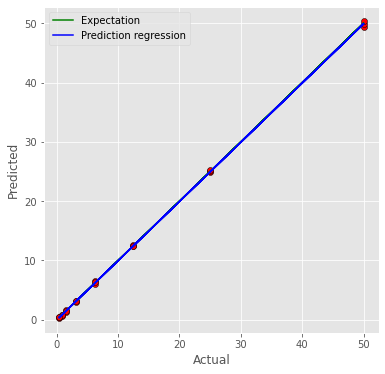

In [203]:
num_comp = 12
num_discarded = 154
# Sort according to the num_comp then select (cut from num_discardeed onward)
Xselected, indices = sort_variable(X.values, y, num_comp)
Xselected = Xselected[:, num_discarded:]
# Now test the performance with the selected num_comp and selected variables
y_cv, mse, r2, rpd = pls_evaluate_and_plot_num_comp(Xselected, y, num_comp)

In [259]:
# Make prediction
pls = PLS(n_components=num_comp)
X_sample = sample_clean[[str(i) for i in range(300, 802, 2)]].values[:, indices]
X_sample = X_sample[:, :num_discarded]
print("Test results: ", pls.fit(Xselected, y).predict(X_sample).mean())


Test results:  21.728459958942256


### It is still bad results 
### Let's make predictions with the maximal absoirbtion wave length

In [258]:
bestwavelength = list(data_clean)[1:][np.argmax(data_clean.values[0, 1:])]
x_train = data_clean[[bestwavelength]]
x_test = sample_clean[[bestwavelength]]
print("Test results: ", LinearRegression().fit(x_train, y).predict(x_test).mean())


Test results:  44.087146653402804


In [247]:
lin_model.predict()

LinearRegression()

In [244]:
y

array([50.      , 25.      , 12.5     ,  6.25    ,  3.125   ,  1.5625  ,
        0.78125 ,  0.390625, 50.      , 25.      , 12.5     ,  6.25    ,
        3.125   ,  1.5625  ,  0.78125 ,  0.390625, 50.      , 25.      ,
       12.5     ,  6.25    ,  3.125   ,  1.5625  ,  0.78125 ,  0.390625])

In [252]:
bestwavelength

'534'

In [254]:
x_test

,534
0,1.499333
1,1.438333
2,1.460333


In [255]:
sample_clean

,Dilution,300,302,304,306,308,310,312,314,316,...,782,784,786,788,790,792,794,796,798,800
0,1,1.689667,1.509,1.373,1.226333,1.104333,1.022667,0.965333,0.920,0.891333,...,-0.034667,-0.034,-0.033667,-0.033,-0.033,-0.034333,-0.034333,-0.033667,-0.033667,-0.034667
1,1,2.036667,1.830,1.657,1.465333,1.323333,1.224667,1.149333,1.088,1.047333,...,-0.027667,-0.027,-0.026667,-0.026,-0.026,-0.028333,-0.027333,-0.028667,-0.027667,-0.026667
2,1,1.723667,1.536,1.385,1.223333,1.093333,1.005667,0.944333,0.893,0.858333,...,-0.032667,-0.033,-0.032667,-0.031,-0.032,-0.033333,-0.032333,-0.033667,-0.034667,-0.033667
